In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile

import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'plant-disease-recognition-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1447507%2F2394131%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240422%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240422T183922Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D10f7e94091b79694ed519198e042fd6c6c5d2563d1d34ca509291fbd33e799ca0159b9fc3ec1762bd20ae396eae01a83ef1531325fdf9ccf2017c11ed20f9bd13574721c1739e9b69e852e024053b6583df880654e415acd00f5eb926c4dcb8d9b08d5eca0f4e9d7b49e99521db0b73e88569efc80ecdb4bfa6bf4a3dd9d3fdffbb4a5608b3e18191920dae51872bed9284947064aa4ea8142eb5f39484261eae59ee62217fe428e7f9c00c9cc8db72c1a6b8a4508b787bd1195fcdcbec50fdbfb9d7b93392cff64340cf2759ddf4997d1921cbc5dd3c64f9f6f9f738281cbe2317b0a2c578617f494ce275e16f2c37fda59826c29fc893309e56ce511366389'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1339624018 bytes downloaded
Downloaded and uncompressed: plant-disease-recognition-dataset
Data source import complete.


In [ ]:
import os
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
base_dir = '/kaggle/input/plant-disease-recognition-dataset'
train_dir = os.path.join(base_dir, 'Train', 'Train')
validation_dir = os.path.join(base_dir, 'Validation', 'Validation')

In [ ]:
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

validation_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transforms)
validation_dataset = datasets.ImageFolder(root=validation_dir, transform=validation_transforms)

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True, num_workers=4)
validation_loader = DataLoader(validation_dataset, batch_size=10, shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


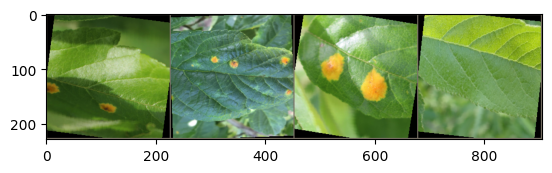

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# Get a batch of training data
inputs, classes = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, );

In [ ]:
inputs.shape

torch.Size([4, 3, 224, 224])

In [ ]:
!pip install --quiet norse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from norse.torch import (
    lif_step,
    lift,
    lif_feed_forward_step,
    lif_current_encoder,
    LIFParameters,
)

N = 1  # number of neurons to consider
T = 100  # number of timesteps to integrate

p = LIFParameters()
v = torch.zeros(N)  # initial membrane voltage
input_current = 1.1 * torch.ones(N)

voltages = []

for ts in range(T):
    z, v = lif_current_encoder(input_current, v, p)
    voltages.append(v)

voltages = torch.stack(voltages)

In [ ]:
import torchvision

In [ ]:
from norse.torch import ConstantCurrentLIFEncoder

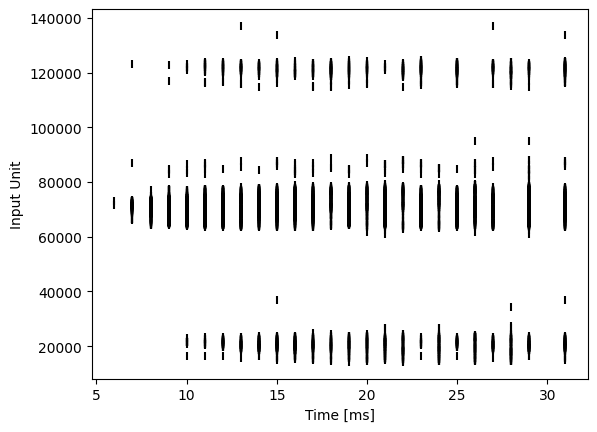

In [ ]:
T = 32
example_encoder = ConstantCurrentLIFEncoder(T)


example_input = example_encoder(inputs[0])
example_spikes = example_input.reshape(T, 3 * 224 * 224).to_sparse().coalesce()
t = example_spikes.indices()[0]
n = example_spikes.indices()[1]

plt.scatter(t, n, marker="|", color="black")
plt.ylabel("Input Unit")
plt.xlabel("Time [ms]")
plt.show()

In [ ]:
from norse.torch import PoissonEncoder

In [ ]:
from norse.torch import SpikeLatencyLIFEncoder

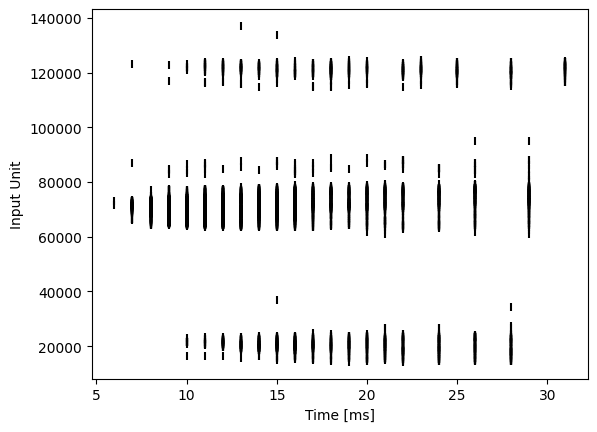

In [ ]:
T = 32
example_encoder = SpikeLatencyLIFEncoder(T)


example_input = example_encoder(inputs[0])
example_spikes = example_input.reshape(T, 3 * 224 * 224).to_sparse().coalesce()
t = example_spikes.indices()[0]
n = example_spikes.indices()[1]

plt.scatter(t, n, marker="|", color="black")
plt.ylabel("Input Unit")
plt.xlabel("Time [ms]")
plt.show()

In [ ]:
class Model(torch.nn.Module):
    def __init__(self, encoder, snn, decoder):
        super(Model, self).__init__()
        self.encoder = encoder
        self.snn = snn
        self.decoder = decoder

    def forward(self, x):
        x = self.encoder(x)
        x = self.snn(x)
        #print('x.shape :',x.shape)
        log_p_y = self.decoder(x)
        return log_p_y

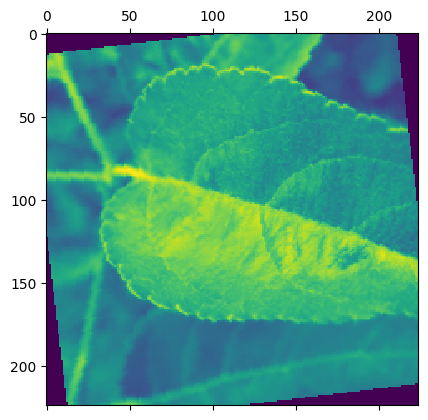

0


In [ ]:
img, label = train_dataset[1]

plt.matshow(img[0])
plt.show()
print(label)

In [ ]:
def decode(x):
    x, _ = torch.max(x, 0)
    log_p_y = torch.nn.functional.log_softmax(x, dim=1)
    #print("decode x shape",log_p_y.shape)
    #print("decoded values",log_p_y)
    return log_p_y

In [ ]:
def decode_last(x):
    x = x[-1]
    log_p_y = torch.nn.functional.log_softmax(x, dim=1)
    return log_p_y

In [ ]:
from norse.torch.module.leaky_integrator import LILinearCell
from norse.torch.functional.lif import LIFFeedForwardState
from norse.torch.functional.leaky_integrator import LIState
from norse.torch.module.lif import LIFCell, LIFRecurrentCell

from typing import NamedTuple


class ConvNet(torch.nn.Module):
    def __init__(self, num_channels=3, feature_size=224, method="super", alpha=100):
        super(ConvNet, self).__init__()

        self.features = int(((feature_size - 4) / 2 - 4) / 2)

        self.conv1 = torch.nn.Conv2d(num_channels, 20, 3, 1)
        self.conv2 = torch.nn.Conv2d(20, 50, 5, 1)
        self.fc1 = torch.nn.Linear(7200, 40)
        self.lif0 = LIFCell(p=LIFParameters(method=method, alpha=alpha))
        self.lif1 = LIFCell(p=LIFParameters(method=method, alpha=alpha))
        self.lif2 = LIFCell(p=LIFParameters(method=method, alpha=alpha))
        self.out = LILinearCell(40, 3)

    def forward(self, x,view = False ):
        seq_length = x.shape[0]
        batch_size = x.shape[1]

        # specify the initial states
        s0 = s1 = s2 = so = None

        voltages = torch.zeros(
            seq_length, batch_size, 3, device=x.device, dtype=x.dtype
        )

        for ts in range(seq_length):

            if view = True and ts == 0:
                print("Raw Input :",z[0])

            z = self.conv1(x[ts, :])


            if view = True and ts == 0:
                print("After 1st conv :",z[0])

            z, s0 = self.lif0(z, s0)

            if view = True and ts == 0:
                print("After lif0 :",z[0])

            z = torch.nn.functional.max_pool2d(z, 4, 4)

            if view = True and ts == 0:
                print("After max pool 2d :",z[0])

            z = self.conv2(z)

            if view = True and ts == 0:
                print("After 2nd conv :",z[0])"

            z, s1 = self.lif1(z, s1)

            if view = True and ts == 0:
                print("After lif1 :",z[0])

            z = torch.nn.functional.max_pool2d(z, 4, 4)

            if view = True and ts == 0:
                print("After max pool 2d :",z[0])

            z = z.view(-1, 50*12*12)

            if view = True and ts == 0:
                print("After max pool 2d :",z[0])

            z = self.fc1(z)

            if view = True and ts == 0:
                print("After fully connected 1 :",z[0])

            z, s2 = self.lif2(z, s2)

            if view = True and ts == 0:
                print("After lif2 :",z[0])

            #print(v.shape)
            v, so = self.out(torch.nn.functional.relu(z), so)

            if view = True and ts == 0:
                print('inside snn class final voltage :',v[0])


            voltages[ts, :, :] = v

        return voltages

In [ ]:
import importlib
from norse.torch.module import encode

encode = importlib.reload(encode)

In [ ]:
T = 10
LR = 0.001
EPOCHS = 5  # Increase this for improved accuracy

if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
else:
    DEVICE = torch.device("cpu")

model = Model(
    encoder=encode.ConstantCurrentLIFEncoder(T), snn=ConvNet(alpha=40), decoder=decode
).to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=LR)
model

Model(
  (encoder): ConstantCurrentLIFEncoder()
  (snn): ConvNet(
    (conv1): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1))
    (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
    (fc1): Linear(in_features=7200, out_features=40, bias=True)
    (lif0): LIFCell(p=LIFParameters(tau_syn_inv=tensor(200.), tau_mem_inv=tensor(100.), v_leak=tensor(0.), v_th=tensor(1.), v_reset=tensor(0.), method='super', alpha=tensor(40)), dt=0.001)
    (lif1): LIFCell(p=LIFParameters(tau_syn_inv=tensor(200.), tau_mem_inv=tensor(100.), v_leak=tensor(0.), v_th=tensor(1.), v_reset=tensor(0.), method='super', alpha=tensor(40)), dt=0.001)
    (lif2): LIFCell(p=LIFParameters(tau_syn_inv=tensor(200.), tau_mem_inv=tensor(100.), v_leak=tensor(0.), v_th=tensor(1.), v_reset=tensor(0.), method='super', alpha=tensor(40)), dt=0.001)
    (out): LILinearCell()
  )
)

In [ ]:
from tqdm.notebook import tqdm, trange

EPOCHS = 5  # Increase this number for better performance


def train(model, device, train_loader, optimizer, epoch, max_epochs):
    model.train()
    losses = []

    for (data, target) in tqdm(train_loader, leave=False):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()

        #print("The shape of data before entering training : ",data.shape)

        output = model(data)

        #print("ou")
        loss = torch.nn.functional.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    mean_loss = np.mean(losses)
    return losses, mean_loss

In [ ]:
def test(model, device, test_loader, epoch):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)

            #print(output)
            #print(target)
            test_loss += torch.nn.functional.nll_loss(
                output, target, reduction="sum"
            ).item()  # sum up batch loss
            pred = output.argmax(
                dim=1, keepdim=True
            )  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    accuracy = 100.0 * correct / len(test_loader.dataset)

    return test_loss, accuracy

In [ ]:
training_losses = []
mean_losses = []
test_losses = []
accuracies = []

for epoch in trange(EPOCHS):
    training_loss, mean_loss = train(
        model, DEVICE, train_loader, optimizer, epoch, max_epochs=EPOCHS
    )
    validation_loss, accuracy = test(model, DEVICE, validation_loader, epoch)
    training_losses += training_loss
    mean_losses.append(mean_loss)
    test_losses.append(validation_loss)
    accuracies.append(accuracy)
    print(f"epoch: {epoch}, mean_loss: {mean_loss}, test_loss: {validation_loss}, accuracy: {accuracy}", flush=True)

print(f"final accuracy: {accuracies[-1]}")

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/331 [00:00<?, ?it/s]

epoch: 0, mean_loss: 1.0986123085021973, test_loss: 1.0986123085021973, accuracy: 33.333333333333336


  0%|          | 0/331 [00:00<?, ?it/s]

epoch: 1, mean_loss: 1.0986123085021973, test_loss: 1.0986123085021973, accuracy: 33.333333333333336


  0%|          | 0/331 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
SNN.train()
losses = []

for (data, target) in tqdm(train_loader, leave=False):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = SNN(data)

        # Forward pass
        output_tuple = SNN.init_state(batch_size=data.size(0))
        output_tuple, _ = SNN(data, output_tuple)

        loss = torch.nn.functional.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

mean_loss = np.mean(losses)

In [ ]:
from tqdm.notebook import tqdm, trange

EPOCHS = 5  # Increase this number for better performance


def train(model, device, train_loader, optimizer, epoch, max_epochs):
    model.train()
    losses = []

    for (data, target) in tqdm(train_loader, leave=False):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = torch.nn.functional.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    mean_loss = np.mean(losses)
    return losses, mean_loss

In [ ]:
def test(model, device, test_loader, epoch):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += torch.nn.functional.nll_loss(
                output, target, reduction="sum"
            ).item()  # sum up batch loss
            pred = output.argmax(
                dim=1, keepdim=True
            )  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    accuracy = 100.0 * correct / len(test_loader.dataset)

    return test_loss, accuracy

In [ ]:
# test_loader = torch.utils.data.DataLoader(
#     torchvision.datasets.MNIST(
#         root=".",
#         train=False,
#         transform=transform,
#     ),
#     batch_size=BATCH_SIZE,
# )

In [ ]:
training_losses = []
mean_losses = []
test_losses = []
accuracies = []

torch.autograd.set_detect_anomaly(True)

for epoch in range(EPOCHS):
    training_loss, mean_loss = train(
        model, DEVICE, train_loader, optimizer, epoch, max_epochs=EPOCHS
    )
    test_loss, accuracy = test(model, DEVICE, train_loader, epoch)
    training_losses += training_loss
    mean_losses.append(mean_loss)
    test_losses.append(test_loss)
    accuracies.append(accuracy)

print(f"final accuracy: {accuracies[-1]}")